<a href="https://colab.research.google.com/github/tqsyed/fc2conv-tf/blob/main/Pre_TF_Getting_started_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the cell below if using Colab

In [ ]:
# %tensorflow_version 2.x 

# What is KERAS

You have just found Keras.
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

    Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
    Supports both convolutional networks and recurrent networks, as well as combinations of the two.
    Runs seamlessly on CPU and GPU.
Read the documentation at  https://keras.io/

# Types of keras models
### Sequential  Models
The Sequential model is a linear stack of layers.
### Functional API
The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.
    

## Creating dummy dataset 

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import tensorflow as tf
from  tensorflow.python import keras
import numpy as np

X, y = datasets.make_blobs(n_samples = 10000, n_features=100, centers=10)
y = tf.keras.utils.to_categorical(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Sequential Models on dummy dataset

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#from keras.models import Sequential
#from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9925
Epoch 2/10
210/210 [==============================] - 1s 3ms/step - loss: 6.7024e-04 - accuracy: 1.0000
Epoch 3/10
210/210 [==============================] - 1s 4ms/step - loss: 4.0207e-04 - accuracy: 1.0000
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 2.8923e-04 - accuracy: 1.0000
Epoch 5/10
210/210 [==============================] - 1s 3ms/step - loss: 2.2650e-04 - accuracy: 1.0000
Epoch 6/10
210/210 [==============================] - 1s 3ms/step - loss: 1.8653e-04 - accuracy: 1.0000
Epoch 7/10
210/210 [==============================] - 1s 4ms/step - loss: 1.5871e-04 - accuracy: 1.0000
Epoch 8/10
210/210 [==============================] - 1s 3ms/step - loss: 1.3828e-04 - accuracy: 1.0000
Epoch 9/10
210/210 [==============================] - 1s 3ms/step - loss: 1.2260e-04 - accuracy: 1.0000
Epoch 10/10
210/210 [==============================] - 1s 3ms/step -

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

26/26 [==============================] - 0s 3ms/step - loss: 1.0760e-04 - accuracy: 1.0000
Test loss: 0.00010759710130514577
Test accuracy: 1.0


In [ ]:
model.predict(X_test).round()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
print(y_test[0])
print(np.argmax(y_test[0]))
prediction = model.predict(X_test[0:1])
print(prediction)
print(np.argmax(prediction))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8
[[2.1581754e-06 3.4043394e-06 7.6118986e-06 4.1452995e-06 1.1459590e-06
  3.1871497e-10 3.7967482e-07 2.9832097e-09 9.9998105e-01 9.7250577e-08]]
8


## Sequential Models on the MNIST dataset

In [ ]:
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
#from keras.datasets import mnist
#from keras.models import Sequential

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Flatten the images into single vector


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_test_copy = y_test.copy()

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes) 
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 4.1390 - accuracy: 0.8907
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3821 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2729 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2461 - accuracy: 0.9619
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2171 - accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1943 - accuracy: 0.9692
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1880 - accuracy: 0.9730
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1836 - accuracy: 0.9748
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1674 - accuracy: 0.9771
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1588 - accuracy: 0.9781

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

79/79 [==============================] - 1s 3ms/step - loss: 0.6406 - accuracy: 0.9710
Test loss: 0.6406213641166687
Test accuracy: 0.9710000157356262


In [ ]:
example = 100
print(y_test[example])
print(np.argmax(y_test[example]))
prediction = model.predict(x_test[example:example+1])
print(prediction)
print(np.argmax(prediction))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


In [ ]:
print(y_test_copy[example])

6


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline 

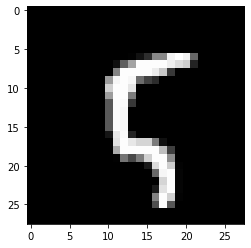

In [ ]:
plt.imshow(x_train[example], cmap="gray")

 ## Why such a low accuracy? Let's have a look at the input.


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Feeding in normalized data

In [ ]:
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
#from keras.datasets import mnist
#from keras.models import Sequential



#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                                # <<<<< notice this
x_test /= 255                                 # <<<<< notice this
print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

## Run this multiple times

In [ ]:
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
#from keras.datasets import mnist
#from keras.models import Sequential

#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

## Initializers 

In [ ]:
import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras import Sequential
#from keras.datasets import mnist
#from keras.models import Sequential

#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, kernel_initializer='lecun_uniform', activation='relu', input_dim=784))
model.add(Dense(512, kernel_initializer='lecun_uniform', activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

## Batch normalization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.datasets import mnist
#from tensorflow.python.keras import Sequential
#import keras
from keras.datasets import mnist
from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = tf.keras.Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(keras.layers.BatchNormalization())                   ### <<<<< notice this
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4620 - accuracy: 0.8693
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2166 - accuracy: 0.9388
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1685 - accuracy: 0.9519
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1398 - accuracy: 0.9602
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9648
Test loss: 0.12162065505981445
Test accuracy: 0.9648000001907349


### Combining things 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.datasets import mnist
#from tensorflow.python.keras import Sequential
#import keras
from keras.datasets import mnist
from keras.models import Sequential


#import keras
#from keras.datasets import mnist
#from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                             
x_test /= 255  

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = tf.keras.Sequential()
model.add(Dense(512, kernel_initializer='he_normal', activation='relu', input_dim=784))
model.add(keras.layers.BatchNormalization())                   ### <<<<< notice this
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

##The 2nd dataset 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.datasets import mnist
#from tensorflow.python.keras import Sequential
#import keras
#from keras.datasets import mnist
#from keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

import keras
from keras.datasets import cifar10
#from keras.models import Sequential
#from keras.layers import Dense

batch_size = 128
num_classes = 10
epochs = 5

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                             
x_test /= 255  

print(x_train.shape)


# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


model = tf.keras.Sequential()

model.add(Dense(512,  activation='relu', input_dim=3072))             ### <<<<< notice this
model.add(Dense(512,  activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss_and_metrics[0])
print('Test accuracy:', loss_and_metrics[1])

## Let's Play with a CNN now

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

# from keras import optimizers
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003       
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64

opt_rms = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=2,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])


#save to disk
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')
  
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

170508288/170498071 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/2
781/781 [==============================] - 58s 64ms/step - loss: 2.0222 - accuracy: 0.3742 - val_loss: 1.4973 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 2/2
79/79 [==============================] - 2s 16ms/step - loss: 1.3916 - accuracy: 0.5456

Test result: 54.560 loss: 1.392


In [ ]:

# from keras import optimizers 
from tensorflow.keras import optimizers


model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np



(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=2, batch_size=32, verbose=1,validation_data=(x_test,y_test))

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

170500096/170498071 [==============================] - 11s 0us/step





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
________________________________________________________________